In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv('Dataset/games.csv')
df = df[df['Release Date'] != 'releases on TBD']
df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1509 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         1509 non-null   int64         
 1   Title              1509 non-null   object        
 2   Release Date       1509 non-null   datetime64[ns]
 3   Team               1508 non-null   object        
 4   Rating             1497 non-null   float64       
 5   Times Listed       1509 non-null   object        
 6   Number of Reviews  1509 non-null   object        
 7   Genres             1509 non-null   object        
 8   Summary            1509 non-null   object        
 9   Reviews            1509 non-null   object        
 10  Plays              1509 non-null   object        
 11  Playing            1509 non-null   object        
 12  Backlogs           1509 non-null   object        
 13  Wishlist           1509 non-null   object        
dtypes: datetime64

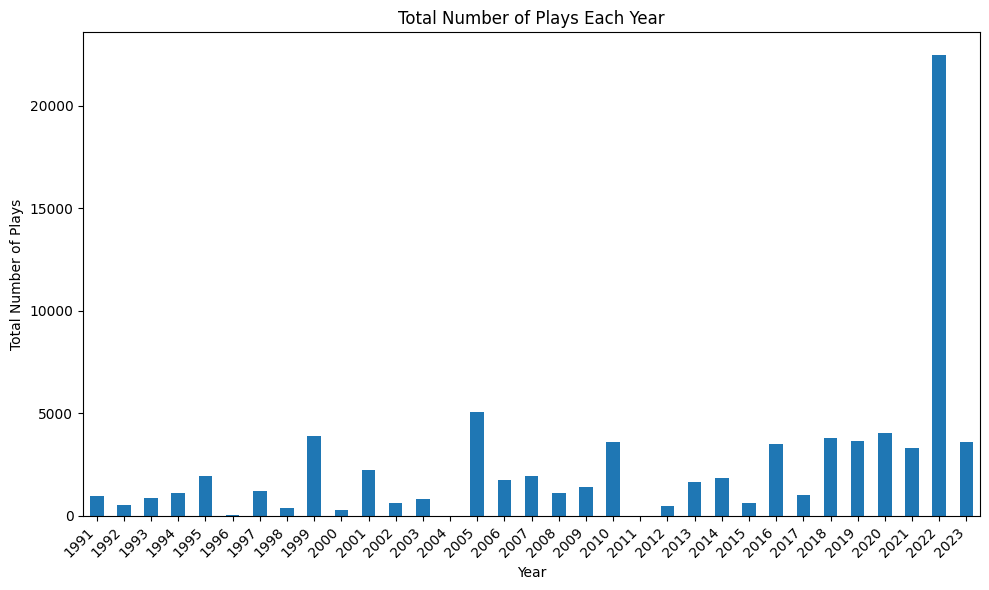

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# TODO: add scrollbar for time range
df['Plays'] = pd.to_numeric(df['Plays'], errors='coerce')
df = df[df['Release Date'].dt.year > 1990]


df_filtered = df[df['Release Date'].dt.year <= 2023]

# TODO: break down each bar by genre, make it interactive so you can limit genres being displayed
total_plays_per_year = df_filtered.groupby(df_filtered['Release Date'].dt.year)['Plays'].sum()

plt.figure(figsize=(10, 6))
total_plays_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Number of Plays')
plt.title('Total Number of Plays Each Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


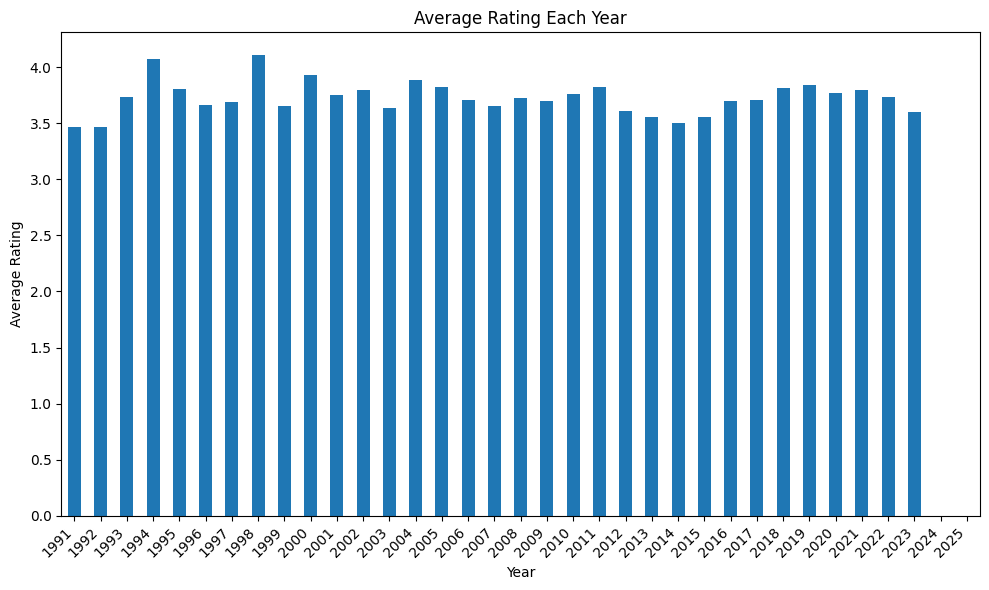

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Same as last plot, but for average rating:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df_filtered = df[df['Release Date'].dt.year >= 1990]
avg_rating_per_year = df_filtered.groupby(df_filtered['Release Date'].dt.year)['Rating'].mean()

plt.figure(figsize=(10, 6))
avg_rating_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating Each Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Combine with the following dataset to visualize sales?? https://www.kaggle.com/datasets/gregorut/videogamesales 

# Applying TODOS

## 1) adjust dataset

In [41]:
from ast import literal_eval
import pandas as pd

df = pd.read_csv('Dataset/games.csv')
df = df[df['Release Date'] != 'releases on TBD']
df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df['Genres'] = df['Genres'].apply(literal_eval)


df_exploded = df.explode('Genres')

df_exploded.info()





<class 'pandas.core.frame.DataFrame'>
Index: 3636 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         3636 non-null   int64         
 1   Title              3636 non-null   object        
 2   Release Date       3636 non-null   datetime64[ns]
 3   Team               3635 non-null   object        
 4   Rating             3616 non-null   float64       
 5   Times Listed       3636 non-null   object        
 6   Number of Reviews  3636 non-null   object        
 7   Genres             3633 non-null   object        
 8   Summary            3636 non-null   object        
 9   Reviews            3636 non-null   object        
 10  Plays              3636 non-null   object        
 11  Playing            3636 non-null   object        
 12  Backlogs           3636 non-null   object        
 13  Wishlist           3636 non-null   object        
dtypes: datetime64

In [42]:
from ast import literal_eval
import pandas as pd

df = pd.read_csv('Dataset/games.csv')
df = df[df['Release Date'] != 'releases on TBD']
df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df['Genres'] = df['Genres'].apply(literal_eval)

df_exploded = df.explode('Genres') # create row for each genre in row's list of genres
genres_dummies = pd.get_dummies(df_exploded['Genres']) # one hot encoding thing...

genres_aggregated = genres_dummies.groupby(genres_dummies.index).sum() # recombine rows that were exploded

df = pd.concat([df, genres_aggregated], axis=1)
df.drop('Genres', axis=1, inplace=True)

df.info()

# df.to_csv('games_genres_expanded.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 1509 entries, 0 to 1511
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           1509 non-null   int64         
 1   Title                1509 non-null   object        
 2   Release Date         1509 non-null   datetime64[ns]
 3   Team                 1508 non-null   object        
 4   Rating               1497 non-null   float64       
 5   Times Listed         1509 non-null   object        
 6   Number of Reviews    1509 non-null   object        
 7   Summary              1509 non-null   object        
 8   Reviews              1509 non-null   object        
 9   Plays                1509 non-null   object        
 10  Playing              1509 non-null   object        
 11  Backlogs             1509 non-null   object        
 12  Wishlist             1509 non-null   object        
 13  Adventure            1509 non-null   i

## 2.) Breakdown bars by genre

In [45]:
import pandas as pd
import numpy as np
import plotly.express as px

# Sample data (replace this with your actual data)
np.random.seed(0)
years = [2019, 2020, 2021]
genres = ['Action', 'Adventure', 'Strategy']
data = {
    'Year': [np.random.choice(years) for _ in range(10)],
    'Genre': [np.random.choice(genres) for _ in range(10)],
    'Plays': np.random.randint(50, 200, 10)
}

df = pd.DataFrame(data)

# Group by year and genre, and sum the plays
plays_per_year_genre = df.groupby(['Year', 'Genre']).sum().reset_index()

# Create a stacked bar chart using Plotly
fig = px.bar(plays_per_year_genre, x='Year', y='Plays', color='Genre', title='Stacked Bar Chart',
             labels={'Plays': 'Total Plays', 'Genre': 'Genre'})

fig.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [49]:
import pandas as pd
import numpy as np
import plotly.express as px


df = pd.read_csv('Dataset/games.csv')
df = df[df['Release Date'] != 'releases on TBD']
df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))

df.info()

df['Genres'] = df['Genres'].dropna().apply(literal_eval)
genre_values = df['Genres'].dropna().explode().unique()
df_exploded = df.explode('Genres') # create row for each genre in row's list of genres

np.random.seed(0)
years = df_exploded['Release Date']
genres = df_exploded['Genres']
data = {
    'Year': years,
    'Genre': genres,
    'Plays': df_exploded['Plays']
}

df = pd.DataFrame(data)

plays_per_year_genre = df.groupby(['Year', 'Genre']).sum().reset_index()

fig = px.bar(plays_per_year_genre, x='Year', y='Plays', color='Genre', title='Stacked Bar Chart',
             labels={'Plays': 'Total Plays', 'Genre': 'Genre'})

fig.show()


<class 'pandas.core.frame.DataFrame'>
Index: 1509 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         1509 non-null   int64         
 1   Title              1509 non-null   object        
 2   Release Date       1509 non-null   datetime64[ns]
 3   Team               1508 non-null   object        
 4   Rating             1497 non-null   float64       
 5   Times Listed       1509 non-null   object        
 6   Number of Reviews  1509 non-null   object        
 7   Genres             1509 non-null   object        
 8   Summary            1509 non-null   object        
 9   Reviews            1509 non-null   object        
 10  Plays              1509 non-null   object        
 11  Playing            1509 non-null   object        
 12  Backlogs           1509 non-null   object        
 13  Wishlist           1509 non-null   object        
dtypes: datetime64

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## 3.) Add interactive component, genre toggling and date scrollbar

# Repeat above, but make breakdown by teams? (could get chaotic)

# Getting Lists

In [63]:
from ast import literal_eval
from gettext import npgettext
import pandas as pd
from datetime import datetime
import numpy as np


df = pd.read_csv('Dataset/games.csv')
df = df[df['Release Date'] != 'releases on TBD']
df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df['Genres'] = df['Genres'].dropna().apply(literal_eval)

df['Genres'] = df['Genres'].explode().dropna()

df.head()
# np.savetxt("game_genres.csv", team_values, delimiter=',', fmt='%s')



ValueError: cannot reindex on an axis with duplicate labels

In [66]:
from ast import literal_eval
import pandas as pd
from datetime import datetime

# Read the CSV file
df = pd.read_csv('Dataset/games.csv')

# Filter out rows with 'Release Date' as 'releases on TBD'
df = df[df['Release Date'] != 'releases on TBD']

# Convert 'Release Date' to datetime format
df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))

# Convert 'Genres' column from string to list using literal_eval
df['Genres'] = df['Genres'].apply(literal_eval)

# Explode the 'Genres' column to separate each genre into its own row
df = df.explode('Genres').dropna(subset=['Genres'])  # Drop rows with NaN in 'Genres' column


df = df['Genres', 'Title']

# Save the updated DataFrame to a CSV file
# df.to_csv('game_genres.csv', index=False)

df.head()


,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,Adventure,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,RPG,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,Adventure,A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,Brawler,A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,Indie,A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv('Dataset/games.csv')
df = df[df['Release Date'] != 'releases on TBD']
df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1509 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         1509 non-null   int64         
 1   Title              1509 non-null   object        
 2   Release Date       1509 non-null   datetime64[ns]
 3   Team               1508 non-null   object        
 4   Rating             1497 non-null   float64       
 5   Times Listed       1509 non-null   object        
 6   Number of Reviews  1509 non-null   object        
 7   Genres             1509 non-null   object        
 8   Summary            1509 non-null   object        
 9   Reviews            1509 non-null   object        
 10  Plays              1509 non-null   object        
 11  Playing            1509 non-null   object        
 12  Backlogs           1509 non-null   object        
 13  Wishlist           1509 non-null   object        
dtypes: datetime64

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


# WISHLIST ONE

TOP GAME TEAMS

WORST GAME DEVELOPERS